In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

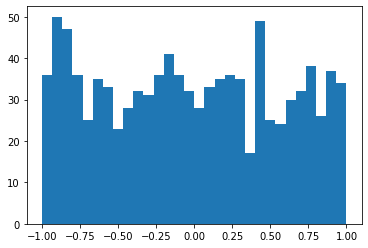

In [154]:
plt.hist(np.random.uniform(-1, 1, size=1000), bins=30);

# Central limit theorem

$X$ - some random variable with known $\mu$ and $\sigma$

${\bar {X}}_{n} = \frac{X_1 + X_2 + ... + X_n}{n}$ - also random variable

${\bar {X}}_{n}$ will be converge to normal dist as $n \to \inf$ with $\mu$ and $\frac{\sigma}{\sqrt(n)}$

The bigger $n$ the smaller will be std

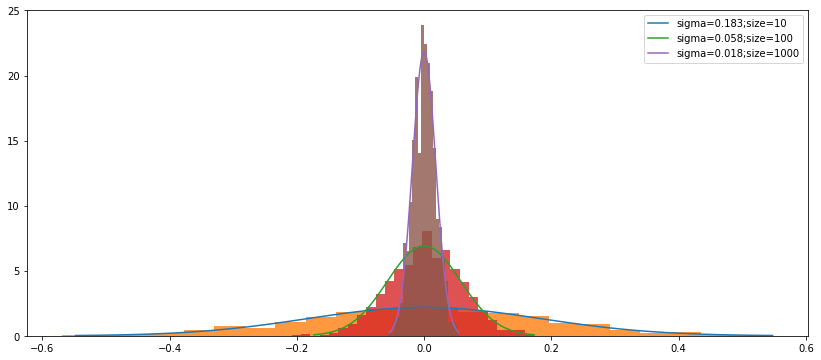

In [171]:
SAMPLES = 1000
plt.figure(figsize=(14, 6))

for SIZE in [10, 100, 1000]:
    means = np.zeros(SAMPLES)
    for i in range(SAMPLES):
        means[i] = np.mean(np.random.uniform(-1, 1, size=SIZE))
        
    mu = 0
    variance = 4/12/SIZE
    sigma = np.sqrt(variance)
    
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'sigma={sigma:.3f};size={SIZE}')
    plt.hist(means, density=True, bins='auto', alpha=0.8);
    plt.legend()

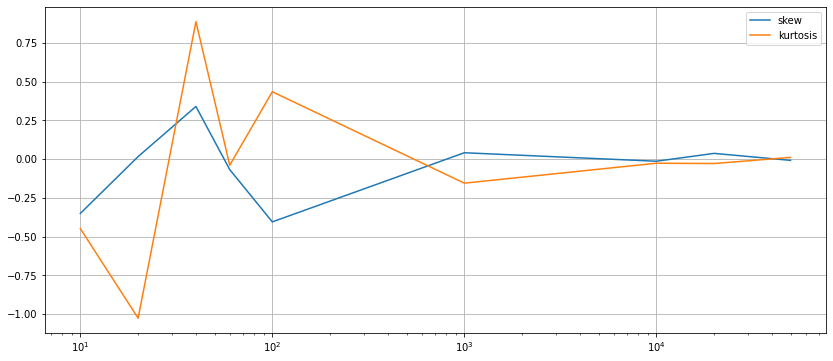

In [172]:
SIZE = 100
plt.figure(figsize=(14, 6))

samp_size = []
skews = []
kurts = []
for SAMPLES in [10, 20, 40, 60, 100, 1000, 10000, 20000, 50000]:
    means = np.zeros(SAMPLES)
    for i in range(SAMPLES):
        means[i] = np.mean(np.random.uniform(-1, 1, size=SIZE))
        
    mu = 0
    variance = 4/12/SIZE
    sigma = np.sqrt(variance)
    
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    samp_size.append(SAMPLES)
    skews.append(stats.skew(means))
    kurts.append(stats.kurtosis(means))

plt.plot(samp_size, skews, label='skew')
plt.plot(samp_size, kurts, label='kurtosis')
plt.grid()
plt.xticks(samp_size)
plt.xscale('log',base=10) 
plt.legend()

# Confidence intervals

## Mean when $\sigma^2$ known or sample size is large enough

$ Z = \frac{\bar{X} - \mu}{\sigma/\sqrt(n)} $ - N(0,1)

$ P(-z_{1-{\frac {\alpha }{2}}}\leq Z\leq z_{1-{\frac {\alpha }{2}}})=1-\alpha $

$ P(\bar{X} - z_{1-{\frac{\alpha}{2}}} {\frac{\sigma}{\sqrt{n}}}
  \leq
  \mu
  \leq
  \bar{X} + z_{1-{\frac{\alpha}{2}}}{\frac {\sigma }{\sqrt {n}}}
  )=1-\alpha $

if need p = 0.95 => $\alpha = 0.05$ $ z_{0.975} = 1.96 $

In [178]:
1 - 0.05/2, stats.norm.ppf(q=0.975)

(0.975, 1.959963984540054)

funny part, it says, that $\mu$ is inside $(\bar{X} +/- z_{1-{\frac{\alpha}{2}}} {\frac{\sigma}{\sqrt{n}}})$

but $\bar{X}$ is random variable

internet says that we can just substitute $\bar{X}$ with $\bar{x}$ (computed avg of the sample) idk, sounds legit

but it won't give us the prob for $\mu$ only the prob of having $\mu$ in this boundaries
for this particular sample

for case $p=0.95; \alpha=0.005$ that would mean that if we repeat taking samples like this
then in 95% of cases real $\mu$ would be in this boundaries, and in 5% it will not

shows how confident we are about boundaries

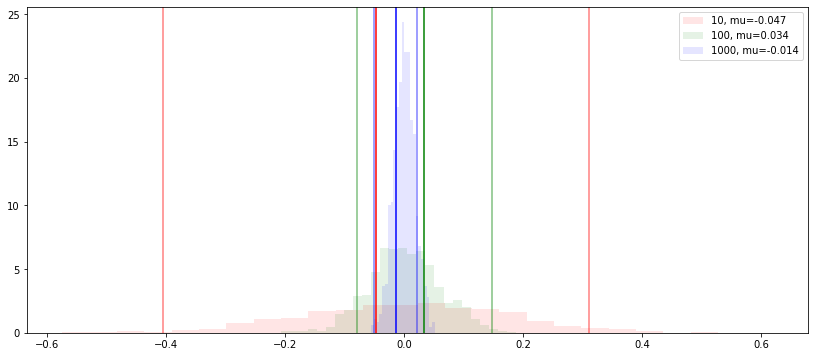

In [195]:
sizes = [10, 100, 1000]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
SAMPLES = 1000
plt.figure(figsize=(14, 6))

p = 0.95
alpha = 1 - (1-p)/2
z_alpha = stats.norm.ppf(q=0.975)
mu = 0
var = 1/3
std = np.sqrt(var)

means = {}
for SIZE in sizes:
    ms = np.zeros(SAMPLES)
    for i in range(SAMPLES):
        ms[i] = np.mean(np.random.uniform(-1, 1, size=SIZE))
    means[SIZE] = ms
 
for color, SIZE in zip(colors, sizes):
    mean = np.mean(np.random.uniform(-1, 1, size=SIZE))
        
    lb = mean - z_alpha*std/np.sqrt(SIZE)
    ub = mean + z_alpha*std/np.sqrt(SIZE)
    
    plt.axvline(x=mean, color=color)
    plt.axvline(x=lb, color=color, alpha=0.5)
    plt.axvline(x=ub, color=color, alpha=0.5)
    plt.hist(means[SIZE], color=color, density=True, bins='auto', alpha=0.1, label=f'{SIZE}, mu={mean:.3f}');
    plt.legend()

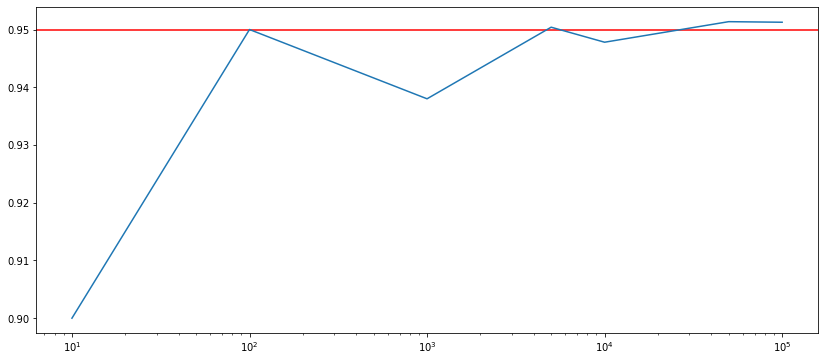

In [226]:
SIZE=1000
SAMPLES=1000

p = 0.95
alpha = 1 - (1-p)/2
z_alpha = stats.norm.ppf(q=0.975)
mu = 0
var = 1/3
std = np.sqrt(var)

ssize = [10, 100, 1000, 5000, 10000, 50000, 100000]
probs = []
for SAMPLES in ssize:
    ins = 0
    for i in range(SAMPLES):
        mean = np.mean(np.random.uniform(-1, 1, size=SIZE))
            
        lb = mean - z_alpha*std/np.sqrt(SIZE)
        ub = mean + z_alpha*std/np.sqrt(SIZE)
        
        if lb < mu < ub:
            ins += 1
            
    probs.append(ins/SAMPLES)
 
plt.figure(figsize=(14, 6))
plt.axhline(y=p, color='r')
plt.xscale('log',base=10) 
plt.plot(ssize, probs)